In [54]:
#pip install vaderSentiment

In [55]:
import pandas as pd
import re
import matplotlib as plt
import seaborn as sns

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [56]:
dataframe_sentimentos = pd.read_csv('dataframe_final_candidatos_pronto_para_sentimentos.csv')

In [57]:
dataframe_sentimentos.head()

,Data_Hora,IdTweet,Tweet,Candidato,tweet_limpo
0,2022-07-30 21:56:23+00:00,1553499774732599312,@LulaOficial Sabemos o que fez no verão passad...,Lula,sabemos o que fez no verão passado.
1,2022-07-30 21:56:23+00:00,1553499773126180865,@LuisDerieul Mentiroso. Lula tá aqui no Ceará ...,Lula,mentiroso. lula tá aqui no ceará hoje o lança...
2,2022-07-30 21:56:22+00:00,1553499770773245952,@senadorhumberto @LulaOficial Só se vê grama.....,Lula,só se vê grama...até os jumentos se evadiram...
3,2022-07-30 21:56:22+00:00,1553499770378928134,"@SF_Moro Tu tá com o Lula Marreco, para de show!",Lula,"tu tá com o lula marreco, para de show!"
4,2022-07-30 21:56:21+00:00,1553499766763536384,@LulaOficial @ricardostuckert Duvido que tenha...,Lula,duvido que tenham ido de graça...


In [58]:
analizador_de_texto = SentimentIntensityAnalyzer()

In [59]:
dataframe_sentimentos['Sentimento'] = dataframe_sentimentos['tweet_limpo'].apply(lambda i:analizador_de_texto.polarity_scores(' '.join(re.findall(r'\w+', i.lower()))))

In [60]:
#dataframe_sentimentos.head()
dataframe_sentimentos.tail()

,Data_Hora,IdTweet,Tweet,Candidato,tweet_limpo,Sentimento
148,2022-07-30 22:05:13+00:00,1553501997613162499,@tonvieira87 @cirogomes Votaria por*@ nenhuma....,Ciro Gomes,votaria por*@ nenhuma. em 2018 quando só o c...,"{'neg': 0.05, 'neu': 0.95, 'pos': 0.0, 'compou..."
149,2022-07-30 22:05:13+00:00,1553501996510068744,Saiu a sua toalha coroné sirugomi @cirogomes h...,Ciro Gomes,saiu a sua toalha coroné sirugomi,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
150,2022-07-30 22:05:03+00:00,1553501953702895617,"@LeonardoBoff @cirogomes Na verdade, muita gen...",Ciro Gomes,"na verdade, muita gente custa a aceitar que ...","{'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'comp..."
151,2022-07-30 22:04:55+00:00,1553501921452892161,@revistaoeste @cirogomes Ja marcou a passagem ...,Ciro Gomes,ja marcou a passagem para paris?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
152,2022-07-30 22:04:52+00:00,1553501910845497346,@opovo 😂😂😂😂😂 Tá sei kkkkkkkkkkkk\n\nÉ @cirogom...,Ciro Gomes,😂😂😂😂😂 tá sei kkkkkkkkkkkké presidente e g...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [61]:
dataframe_sentimentos['Sentimento']

0      {'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'comp...
1      {'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'comp...
2      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                             ...                        
148    {'neg': 0.05, 'neu': 0.95, 'pos': 0.0, 'compou...
149    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
150    {'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'comp...
151    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
152    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: Sentimento, Length: 153, dtype: object

In [62]:
dataframe_sentimentos['Positivo'] = dataframe_sentimentos['Sentimento'].apply(lambda i:i['pos']) 
dataframe_sentimentos['Negativo'] = dataframe_sentimentos['Sentimento'].apply(lambda i:i['neg']) 
dataframe_sentimentos['Neutro'] = dataframe_sentimentos['Sentimento'].apply(lambda i:i['neu']) 

dataframe_sentimentos['Composicao'] = dataframe_sentimentos['Sentimento'].apply(lambda i:i['compound']) 

In [63]:
dataframe_sentimentos.head()

,Data_Hora,IdTweet,Tweet,Candidato,tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao
0,2022-07-30 21:56:23+00:00,1553499774732599312,@LulaOficial Sabemos o que fez no verão passad...,Lula,sabemos o que fez no verão passado.,"{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'comp...",0.0,0.268,0.732,-0.2960
1,2022-07-30 21:56:23+00:00,1553499773126180865,@LuisDerieul Mentiroso. Lula tá aqui no Ceará ...,Lula,mentiroso. lula tá aqui no ceará hoje o lança...,"{'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'comp...",0.0,0.224,0.776,-0.7579
2,2022-07-30 21:56:22+00:00,1553499770773245952,@senadorhumberto @LulaOficial Só se vê grama.....,Lula,só se vê grama...até os jumentos se evadiram...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000
3,2022-07-30 21:56:22+00:00,1553499770378928134,"@SF_Moro Tu tá com o Lula Marreco, para de show!",Lula,"tu tá com o lula marreco, para de show!","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000
4,2022-07-30 21:56:21+00:00,1553499766763536384,@LulaOficial @ricardostuckert Duvido que tenha...,Lula,duvido que tenham ido de graça...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000


In [64]:
sentimento = []

In [65]:
for i in dataframe_sentimentos['Composicao']:
  if i >= 0.05:
    sentimento.append('Positivo')
  elif i <= (-0.05):
    sentimento.append('Negativo')
  else:
    sentimento.append('Neutro')


In [66]:
sentimento

['Negativo',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Negativo',
 'Negativo',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Negativo',
 'Negativo',
 'Negativo',
 'Negat

In [67]:
dataframe_sentimentos['Sentimento_final'] = sentimento

In [68]:
dataframe_sentimentos.head()

,Data_Hora,IdTweet,Tweet,Candidato,tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_final
0,2022-07-30 21:56:23+00:00,1553499774732599312,@LulaOficial Sabemos o que fez no verão passad...,Lula,sabemos o que fez no verão passado.,"{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'comp...",0.0,0.268,0.732,-0.2960,Negativo
1,2022-07-30 21:56:23+00:00,1553499773126180865,@LuisDerieul Mentiroso. Lula tá aqui no Ceará ...,Lula,mentiroso. lula tá aqui no ceará hoje o lança...,"{'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'comp...",0.0,0.224,0.776,-0.7579,Negativo
2,2022-07-30 21:56:22+00:00,1553499770773245952,@senadorhumberto @LulaOficial Só se vê grama.....,Lula,só se vê grama...até os jumentos se evadiram...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000,Neutro
3,2022-07-30 21:56:22+00:00,1553499770378928134,"@SF_Moro Tu tá com o Lula Marreco, para de show!",Lula,"tu tá com o lula marreco, para de show!","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000,Neutro
4,2022-07-30 21:56:21+00:00,1553499766763536384,@LulaOficial @ricardostuckert Duvido que tenha...,Lula,duvido que tenham ido de graça...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000,Neutro


In [69]:
dataframe_sentimentos['Sentimento_final'].value_counts()

Neutro      122
Negativo     28
Positivo      3
Name: Sentimento_final, dtype: int64

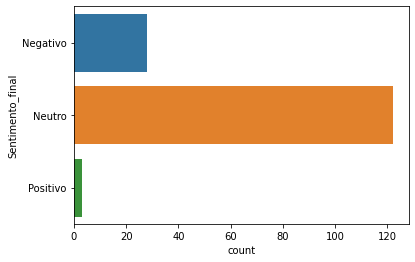

In [70]:
#plt.figure(figsize=(20, 5))
sns.countplot(y='Sentimento_final', data=dataframe_sentimentos)

In [71]:
#resultado_filtro_lula = dataframe_sentimentos(dataframe_sentimentos='Lula')

In [72]:
dataframe_sentimentos.head()

,Data_Hora,IdTweet,Tweet,Candidato,tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_final
0,2022-07-30 21:56:23+00:00,1553499774732599312,@LulaOficial Sabemos o que fez no verão passad...,Lula,sabemos o que fez no verão passado.,"{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'comp...",0.0,0.268,0.732,-0.2960,Negativo
1,2022-07-30 21:56:23+00:00,1553499773126180865,@LuisDerieul Mentiroso. Lula tá aqui no Ceará ...,Lula,mentiroso. lula tá aqui no ceará hoje o lança...,"{'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'comp...",0.0,0.224,0.776,-0.7579,Negativo
2,2022-07-30 21:56:22+00:00,1553499770773245952,@senadorhumberto @LulaOficial Só se vê grama.....,Lula,só se vê grama...até os jumentos se evadiram...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000,Neutro
3,2022-07-30 21:56:22+00:00,1553499770378928134,"@SF_Moro Tu tá com o Lula Marreco, para de show!",Lula,"tu tá com o lula marreco, para de show!","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000,Neutro
4,2022-07-30 21:56:21+00:00,1553499766763536384,@LulaOficial @ricardostuckert Duvido que tenha...,Lula,duvido que tenham ido de graça...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.0000,Neutro


In [73]:
dataframe_final = dataframe_sentimentos[['Data_Hora', 'IdTweet', 'Tweet', 'Candidato', 'tweet_limpo', 'Sentimento_final']]

In [74]:
dataframe_final.head()

,Data_Hora,IdTweet,Tweet,Candidato,tweet_limpo,Sentimento_final
0,2022-07-30 21:56:23+00:00,1553499774732599312,@LulaOficial Sabemos o que fez no verão passad...,Lula,sabemos o que fez no verão passado.,Negativo
1,2022-07-30 21:56:23+00:00,1553499773126180865,@LuisDerieul Mentiroso. Lula tá aqui no Ceará ...,Lula,mentiroso. lula tá aqui no ceará hoje o lança...,Negativo
2,2022-07-30 21:56:22+00:00,1553499770773245952,@senadorhumberto @LulaOficial Só se vê grama.....,Lula,só se vê grama...até os jumentos se evadiram...,Neutro
3,2022-07-30 21:56:22+00:00,1553499770378928134,"@SF_Moro Tu tá com o Lula Marreco, para de show!",Lula,"tu tá com o lula marreco, para de show!",Neutro
4,2022-07-30 21:56:21+00:00,1553499766763536384,@LulaOficial @ricardostuckert Duvido que tenha...,Lula,duvido que tenham ido de graça...,Neutro


In [75]:
dataframe_final.to_csv('dataframe_final.csv', sep=',', index=False)